In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv

In [3]:
TS_CSV = './605_mcf_s_ts.csv'
CONFIG_CSV='./605_mcf_s_regret_out.csv'

In [4]:
df = pd.read_csv(TS_CSV)
df.head()


,Timestamp,run_warm_up,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,...,run_43,run_44,run_45,run_46,run_47,run_48,run_49,run_50,run_default_jemalloc,run_default_tcmalloc
0,0,0.003202,0.003189,0.008234,0.000003,0.008189,0.006515,0.003423,0.006398,0.006518,...,0.003355,0.003180,0.006495,0.003313,0.003098,0.003267,0.003290,0.003277,0.003296,0.006213
1,1,0.269778,0.255324,0.337232,0.259727,0.287155,0.276004,0.264863,0.273425,0.272188,...,0.194570,0.271303,0.290402,0.254906,0.271043,0.267426,0.254795,0.271819,0.268986,0.295986
2,2,0.224048,0.320588,0.360686,0.321315,0.366432,0.345090,0.320030,0.331340,0.338332,...,0.310261,0.317487,0.335603,0.309220,0.317204,0.325903,0.308918,0.308733,0.325374,0.928416
3,3,0.334672,0.320588,0.360767,0.321347,0.366432,0.345090,0.320050,0.331535,0.338546,...,0.310294,0.317503,0.335603,0.309220,0.317204,0.325903,0.309129,0.308733,0.325588,0.928416
4,4,0.331973,0.320802,0.360767,0.321357,0.366432,0.345090,0.320076,0.331580,0.338546,...,0.310310,0.317532,0.335603,0.309220,0.317204,0.323868,0.309129,0.308733,0.325588,0.928416


In [5]:
configs = pd.read_csv(CONFIG_CSV)
configs.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
0,False,False,41571,disabled,7,6,47,disabled,42544,633,9329464,disabled,False,True,default,False,-4.955404
1,True,True,11534,secondary,18,22,1,always,21496,188,18583263,phycpu,True,False,always,True,31.578899
2,True,False,37495,primary,20,23,61,auto,3845,147,28483379,phycpu,False,True,never,False,19.534837
3,False,True,15660,secondary,5,9,27,disabled,32114,354,2575066,disabled,True,False,always,True,25.938670
4,False,False,4502,secondary,3,1,76,auto,10205,247,30650986,percpu,False,False,always,True,11.441479


In [6]:
configs.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_max,je_max_background_threads,je_metadata_thp,je_muzzy_decay_ms,je_narenas,je_oversize_threshold,je_percpu_arena,je_retain,je_tcache,je_thp,je_trust_madvise,rss
37,False,False,12338,primary,15,11,73,auto,1292,353,22672338,disabled,True,False,default,True,-8.869882
48,False,False,12338,primary,15,11,73,auto,1650,308,22672338,disabled,False,True,never,True,-8.681332
49,False,False,11977,primary,14,11,73,disabled,1384,339,22246532,phycpu,True,False,default,False,-8.525507
32,False,False,12014,primary,16,11,75,disabled,38003,342,21963088,disabled,True,False,never,False,-8.217655
8,False,False,19065,primary,16,11,73,auto,7698,363,22672338,disabled,True,False,never,True,-8.108291


In [7]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i}' in df.columns]
selected_columns

['run_38', 'run_49', 'run_50']

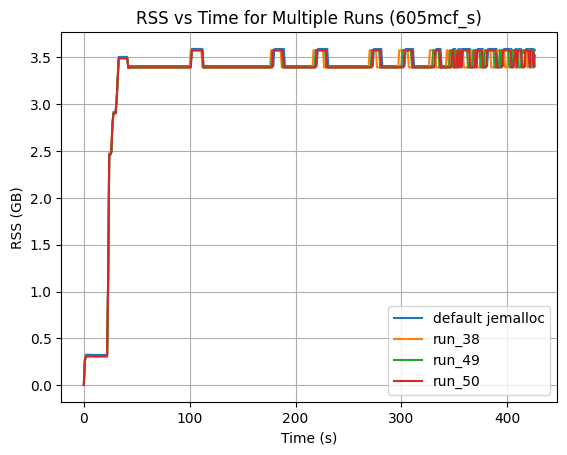

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(TS_CSV)
graph_name = TS_CSV.replace('_ts.csv', '').replace('_', '', 1)[2:]

# Extract timestamps and RSS values for each run
timestamps = df['Timestamp']
warmup = df['run_warm_up']
default = df['run_default_jemalloc']
tc_default = df['run_default_tcmalloc']

# plt.plot(timestamps, warmup / (1024*1024), label='warm_up')
plt.plot(timestamps, default, label='default jemalloc')
#plt.plot(timestamps, tc_default / (1024*1024), label='default tcmalloc')
for column in selected_columns:  # Skip 'Timestamp'
    plt.plot(timestamps, df[column], label=column)

# Customize plot
plt.xlabel('Time (s)')
plt.ylabel('RSS (GB)')
plt.title(f'RSS vs Time for Multiple Runs ({graph_name})')
plt.legend()
plt.grid(True)

# Display plot
plt.show()


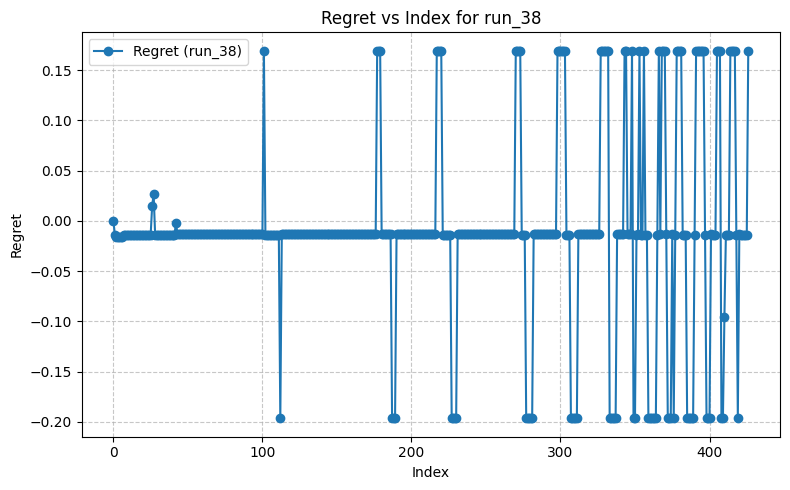

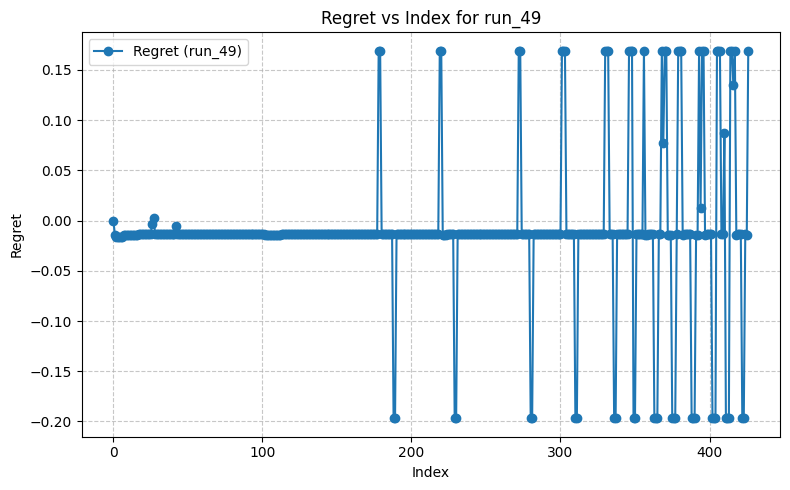

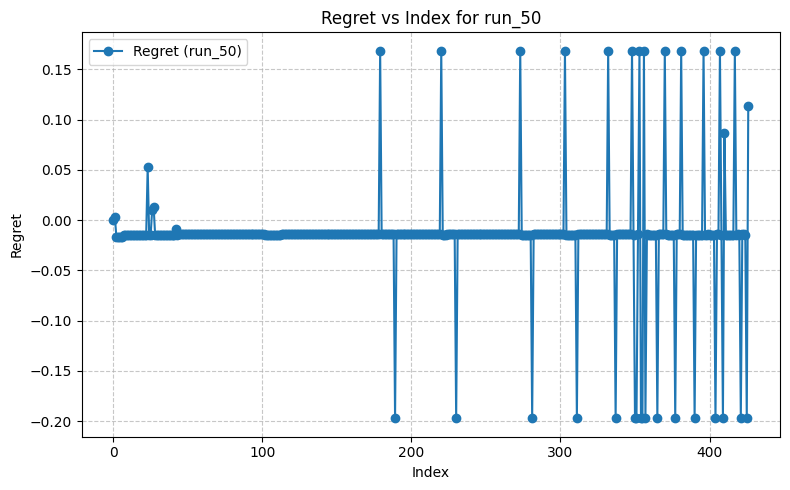

In [9]:
smallest_indices = configs.nsmallest(3, 'rss').index.tolist()

# Step 2: Map these indices to the corresponding column names in `df`
selected_columns = [f'run_{i+1}' for i in smallest_indices if f'run_{i+1}' in df.columns]

# Step 3: Generate separate plots for each selected column
for column in selected_columns:
    # Calculate regret for the current column
    regret =  df[column] - df['run_default_jemalloc']
    
    # Create a new plot for this column
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Plot the regret against the index
    ax.plot(regret.index, regret.values, marker='o', label=f'Regret ({column})')
    
    # Customize the plot
    ax.set_title(f'Regret vs Index for {column}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Regret')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Display the plot
    plt.tight_layout()
    plt.show()

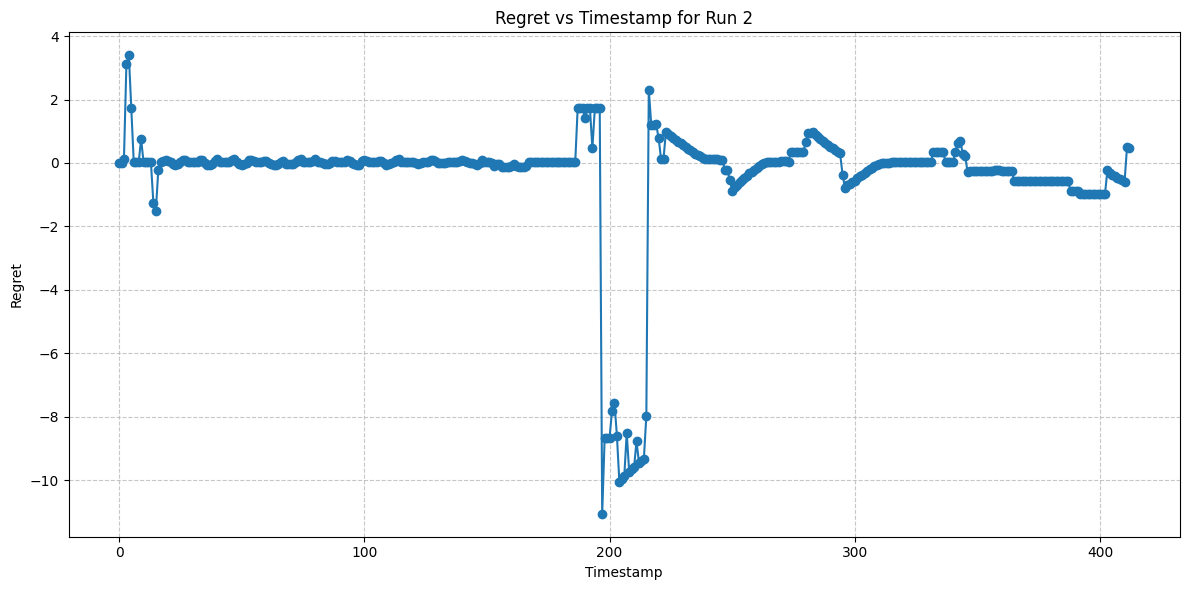

In [17]:
# Convert Timestamp to datetime

# Calculate regret for a specific run (e.g., run 2)
run_column = 'run_41'  # Change this to the column name for the run you want to plot
df['Regret'] = df[run_column] - df['run_default_jemalloc']

intervals = np.diff(df['Timestamp'])
x_range = np.cumsum(np.insert(intervals, 0, 0))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot regret vs timestamp
ax.plot(x_range, df['Regret'], marker='o')

# Customize the plot
ax.set_title('Regret vs Timestamp for Run 2')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Regret')

# Format x-axis to show dates nicely
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.xticks(rotation=45)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

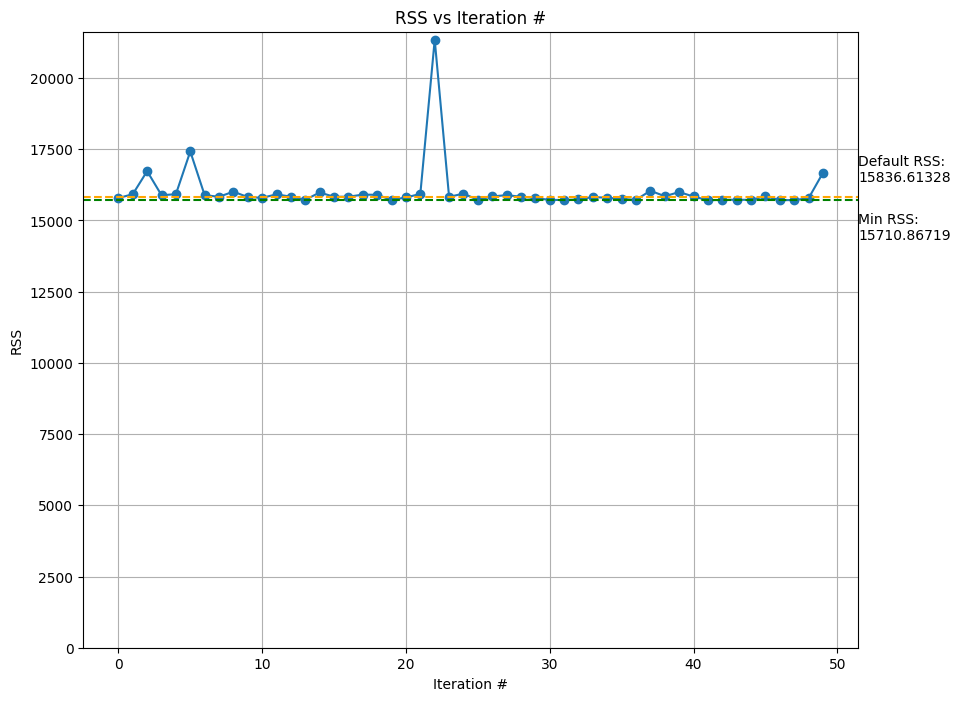

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(df.index, df['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df['rss'].min()
vertical_space = abs(default_rss - min_rss)
higher_line = max(default_rss, min_rss)
lower_line = min(default_rss, min_rss)

offset = (plt.ylim()[1] - plt.ylim()[0]) * 0.02  # 2% of y-axis range

if vertical_space < offset * 2:
    plt.axhline(y=default_rss, color='orange', linestyle='--')
    plt.text(plt.xlim()[1], higher_line + offset, f'{"Default" if higher_line == default_rss else "Min"} RSS:\n{higher_line:.5f}', 
             verticalalignment='bottom', 
             horizontalalignment='left')
    
    plt.axhline(y=min_rss, color='green', linestyle='--')
    plt.text(plt.xlim()[1], lower_line - offset, f'{"Default" if lower_line == default_rss else "Min"} RSS:\n{lower_line:.5f}', 
             verticalalignment='top', 
             horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [17]:
percent_diff = 100 * (default_rss - df['rss'].min()) / default_rss
percent_diff

np.float64(0.7940213464630282)